In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars, MultiTaskLasso, Lasso, ElasticNet, Ridge

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

In [19]:
def pcor(x_data, y_data):
    top = 0
    bottom = 0
    bottom_x = 0
    bottom_y = 0
    x_mean = sum(x_data)
    x_mean = x_mean/len(x_data)
    y_mean = sum(y_data)
    y_mean = y_mean/len(y_data)
    
    for i in range(len(x_data)):
        top += (x_data[i] - x_mean)*(y_data[i] - y_mean)
        
    for i in range(len(x_data)):
        bottom_x += ((x_data[i] - x_mean)**2)
        
    for i in range(len(y_data)):
        bottom_y += ((y_data[i] - y_mean)**2)
        
    bottom = (bottom_x * bottom_y)**0.5
    r = top/bottom
    print("Pearson's correlation coefficient:", r)

In [2]:
def corr(x_data, y_data):
    pairedScores = 0
    for i in range(len(x_data)):
        pairedScores += (x_data[i]*y_data[i])
    sumX = 0
    for i in range(len(x_data)):
        sumX += x_data[i]
    sumY = 0
    for i in range(len(x_data)):
        sumY += y_data[i]
    top = (len(x_data)*pairedScores) - (sumX*sumY)

    varx = 0
    for i in range(len(x_data)):
        varx += len(x_data)*((x_data[i])**2)
    varx -= (sumX)**2
    vary = 0
    for i in range(len(x_data)):
        vary += len(x_data)*((y_data[i])**2)
    vary -= (sumY)**2
    bottom = (varx*vary)**(0.5)

    r = top/bottom
    print("Pearson's correlation coefficient:", r)

In [5]:
nba = pd.read_csv('nba-player-stats-final.csv')
GP = nba['GP']
mins = nba['Total Mins']
points = nba['Total Points']
MPG = nba['MPG']
PPG = nba['PPG']
FGP = nba['FG%']
GS = nba['GS/GP']
salaries = nba['Salaries']

data = nba[['GP', 'Total Mins', 'Total Points', 'MPG', 'PPG', 'FG%', 'GS/GP']]
performance = nba[['GS/GP', 'MPG', 'PPG', 'FG%']]

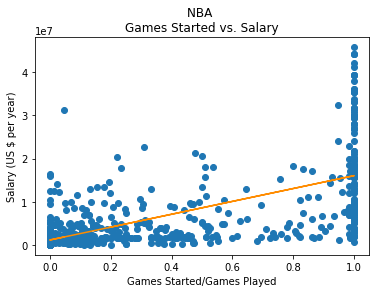

Pearson's correlation coefficient: 0.6510075843112078


In [23]:
m, b = np.polyfit(GS, salaries, 1)

plt.scatter(GS, salaries)
plt.plot(GS, m*GS + b, color='darkorange')
plt.xlabel('Games Started/Games Played')
plt.ylabel('Salary (US $ per year)')
plt.title('NBA \nGames Started vs. Salary')
plt.show()
pcor(GS, salaries)

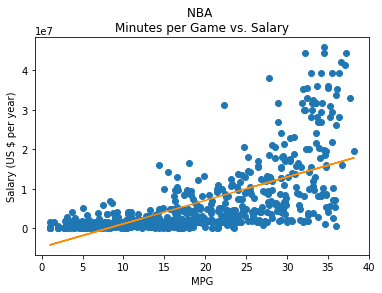

Pearson's correlation coefficient: 0.6505251815336721


In [28]:
m, b = np.polyfit(MPG, salaries, 1)

plt.scatter(MPG, salaries)
plt.plot(MPG, m*MPG + b, color='darkorange')
plt.xlabel('MPG')
plt.ylabel('Salary (US $ per year)')
plt.title('NBA \nMinutes per Game vs. Salary')
plt.show()
pcor(MPG, salaries)

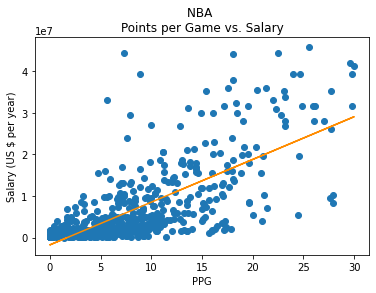

Pearson's correlation coefficient: 0.7236124078364726


In [29]:
m, b = np.polyfit(PPG, salaries, 1)

plt.scatter(PPG, salaries)
plt.plot(PPG, m*PPG + b, color='darkorange')
plt.xlabel('PPG')
plt.ylabel('Salary (US $ per year)')
plt.title('NBA \nPoints per Game vs. Salary')
plt.show()
pcor(PPG, salaries)

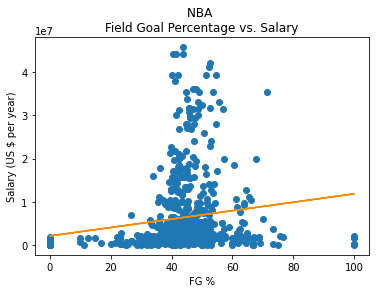

Pearson's correlation coefficient: 0.15534028340766423


In [30]:
m, b = np.polyfit(FGP, salaries, 1)

plt.scatter(FGP, salaries)
plt.plot(FGP, m*FGP + b, color='darkorange')
plt.xlabel('FG %')
plt.ylabel('Salary (US $ per year)')
plt.title('NBA \nField Goal Percentage vs. Salary')
plt.show()
pcor(FGP, salaries)

In [41]:
regr_final = LinearRegression()
regr_final.fit(performance, salaries)

print(regr_final.coef_)
print(regr_final.score(performance, salaries))
print(regr_final.intercept_)

[6559401.723161   -102181.96027467  876426.52152491  -33801.62134125]
0.5513313326758569
510089.4574877117


In [32]:
regr = Ridge()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[6328344.68501627  -95318.68780575  878090.17263304  -33829.76985517]
0.5513029371909929
449795.6254070867


In [33]:
regr = TweedieRegressor()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[279695.57065698 124261.64031195 846169.06015472 -32781.35677046]
0.5295889788923256
-1359261.1147475212


In [34]:
regr = Lasso()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[6559384.16820018 -102181.36827303  876426.5252764   -33801.61705747]
0.5513313326756908
510084.2433218276


In [35]:
regr = ElasticNet()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[527342.8238226   97455.432691   881434.81497413 -33657.59106438]
0.5317627473201412
-1182772.1228080532


In [36]:
regr = LassoLars()
regr.fit(performance, salaries)

print(regr.coef_)
print(regr.score(performance, salaries))
print(regr.intercept_)

[6559030.65018402 -102152.10051798  876398.50062216  -33799.74026788]
0.5513313324741425
509798.29821342416


/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [42]:
salary_predictions = []
residuals = []
for i in range(len(nba)):
    prediction = regr_final.predict([[GS[i], MPG[i], PPG[i], FGP[i]]])
    salary_predictions.append(prediction)
    
for i in range(len(salaries)):
    residuals.append(salaries[i] - salary_predictions[i])

/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-sobeirne/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jupyter-s

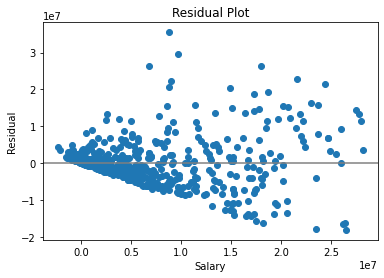

Pearson's correlation coefficient: [5.28595346e-17]


In [43]:
plt.scatter(salary_predictions, residuals)
plt.axhline(0, color = 'gray')
#plt.grid(axis = 'y')
plt.xlabel('Salary')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()
corr(salary_predictions, residuals)

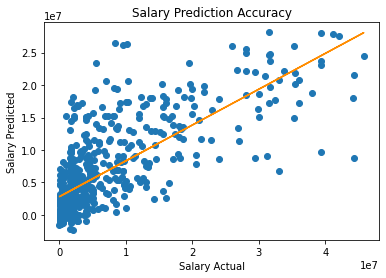

Pearson's correlation coefficient: [0.74251689]


In [44]:
m, b = np.polyfit(salaries, salary_predictions, 1)

plt.scatter(salaries, salary_predictions)
plt.plot(salaries, m*salaries + b, color='darkorange')
plt.xlabel('Salary Actual')
plt.ylabel('Salary Predicted')
plt.title('Salary Prediction Accuracy')
plt.show()
pcor(salaries, salary_predictions)

In [46]:
print(sum(GS)/len(GS))
print(sum(MPG)/len(MPG))
print(sum(PPG)/len(PPG))
print(sum(FGP)/len(FGP))
print(sum(salaries)/len(salaries))

0.3457086271379314
18.697178683385566
7.852037617554861
43.151097178683365
6290373.821316615


In [47]:
len(salaries)

638